# Replication to Vaccines RCTs

## Polio

In [4]:
using Pkg
#Pkg.build("PyCall")

#Pkg.add("PyCall")

using PyCall
using Distributions

In [5]:
np = pyimport("numpy")

PyObject <module 'numpy' from 'C:\\Users\\Luis\\.julia\\conda\\3\\lib\\site-packages\\numpy\\__init__.py'>

In [6]:
NT = 200745 #number of treated

NC = 201229 #number of controlled

YT = 33/NT  #average outcome for treated

YC =115/NC  #average outcome for controlled

#incidence per 100000 

print("Incidence per 100000 among treated:", (YT*100000), "%.                                        ")

print( "Incidence per 100000 among controlled:", (YC*100000),"%.")

Incidence per 100000 among treated:16.438765598146905%.                                        Incidence per 100000 among controlled:57.14882049803955%.

In [7]:
# treatment effect estimate reduction in incidence  per 100000 people

delta_hat = 100000*(YT-YC)

print("Estimate TE of occurances per 100,000 ", (100000*(YT-YC)))

Estimate TE of occurances per 100,000 -40.71005489989265

In [8]:
Var_delta_hat =  (100000^2)*(YT*(1-YT)/NT +  YC*(1-YC)/NC)

# standard deviation

print("Standard deviation for ATE ",(Var_delta_hat^.5))

Standard deviation for ATE 6.047412320702958

In [9]:
# here we are using the fact that outcomes are Bernoulli 

CI_delta0 = delta_hat -1.96*Var_delta_hat^.5
CI_delta1 = delta_hat +1.96*Var_delta_hat^.5

print("95 % confidence interval is [" ,(CI_delta0), ", ",(CI_delta1), "]"   )

95 % confidence interval is [-52.56298304847044, -28.85712675131485]

In [10]:
# Here we calculate the overall effectiveness of the vaccine and construct confidence intervals for it

NV =  200745;
NU =  201229;
RV = 33/NV;
RU = 115/NU;
VE = (RU - RV)/RU;
print("Overall VE is ",(VE) )

Overall VE is 0.7123516206478694

In [11]:
# this recovers the number in the table.

# we set up a simulation example.

# calulate variance of risk estimates:

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU

2.8383662703286493e-9

In [12]:
using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


10000-element Vector{Float64}:
 0.5103271175726766
 0.0994977870428768
 0.5938673586733024
 0.2025064668796312
 0.3455994030215135
 0.5754717937954086
 0.425113906651972
 0.4246171564086245
 0.7138481630971464
 0.5952975902154675
 0.1285867376544186
 0.4483602121987535
 0.17112751583181185
 ⋮
 0.5226700179819506
 0.7234088634862387
 0.6029901598365669
 0.6614310982409137
 0.2786236528380112
 0.6517933926120716
 0.007513228367239955
 0.09034544918240725
 0.6859353655531367
 0.14438161042296752
 0.5050303059254971
 0.3865704272879907

In [13]:
# set-up MC draws:
#Pkg.add("Statistics")
using Statistics

RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ x*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.691806175262947,0.7118171625369496]

In [14]:
#Pkg.add("Distributions")
#Pkg.add("StatsBase")
#Pkg.add("CSV")
#Pkg.add("DataFrames")
#Pkg.add("StatsPlots")

using Distributions  
using StatsBase
using CSV  
using DataFrames    
a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
a
summarystats(a)

b=copy(a)

9501-element Vector{Float64}:
 0.6965921043346879
 0.6918063080552849
 0.691807461547988
 0.691809265620946
 0.6918095961453276
 0.6918209190112188
 0.691827873012325
 0.6918281253327591
 0.6918329622280432
 0.6918335672256124
 0.6918338744461728
 0.691834058975935
 0.6918353091975332
 ⋮
 0.711784949125285
 0.7117861035588644
 0.7117878233076591
 0.7117898800567252
 0.711791858806489
 0.7117942181358864
 0.7118017397362996
 0.711808244637195
 0.7118105870333882
 0.7118146517109636
 0.7118168108701347
 0.7118171289003836

In [15]:
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.702235
Minimum:        0.691806
1st Quartile:   0.697517
Median:         0.702409
3rd Quartile:   0.706998
Maximum:        0.711817


In [16]:
using DataFrames    
df = DataFrame(col1 = b)
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.702235
Minimum:        0.691806
1st Quartile:   0.697517
Median:         0.702409
3rd Quartile:   0.706998
Maximum:        0.711817


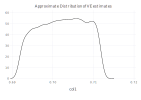

In [17]:
using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0.69, xmax=0.72),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)
    #layer(x = "inuidur1", Geom.density , color=[colorant"black"]),

## Pfizer/BNTX Covid-19 RCT

In [18]:
NV =  19965; # number vaccinated
NU =  20172; # number unvaccinated
RV = 9/NV; # average outcome for vaccinated
RU = 169/NU; # average outcome for unvaccinated
VE = (RU - RV)/RU; # vaccine efficacy

In [19]:
# incidence per 100000
Incidence_RV=RV*100000
Incidence_RU=RU*100000

print("Incidence per 100000 among vaccinated:", Incidence_RV, ".         ")

print("Incidence per 100000 among unvaccinated:", Incidence_RU)

Incidence per 100000 among vaccinated:45.07888805409467.         Incidence per 100000 among unvaccinated:837.7949633154868

In [20]:
# treatment effect - estimated reduction in incidence per 100000 people
delta_hat = 100000*(RV-RU)

print("Estimated ATE of occurances per 100,000 is",  delta_hat)

Estimated ATE of occurances per 100,000 is-792.7160752613921

In [21]:
# variance, standard deviation and confidence interval of ATE using that outcomes are Bernoulli

Var_RV = RV*(1-RV)/NV
Var_RU = RU*(1-RU)/NU
Var_delta_hat =  100000^2*(Var_RV + Var_RU)
Std_delta_hat = sqrt(Var_delta_hat)

print("Standard deviation for ATE is ", Std_delta_hat)


Standard deviation for ATE is 65.91015718590171

In [22]:

CI_b_delta = delta_hat -1.96*sqrt(Var_delta_hat)
CI_u_delta = delta_hat +1.96*sqrt(Var_delta_hat)

print("95 % confidence interval of ATE is [", (CI_b_delta), ",", (CI_u_delta), "]" ,".         "  )

print("Overall VE is", VE)

95 % confidence interval of ATE is [-921.8999833457594,-663.5321671770248].         Overall VE is0.9461934124362605

In [23]:
# we use an approximate bootstrap to find the VE confidence interval
# using Monte Carlo draws as before

using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


RVs = RV .+ x*((Var_RV)^0.5)
RUs = RU .+ x*((Var_RU)^0.5)
VEs= (RUs - RVs) ./ RUs


CI_VE_L = quantile!(VEs, 0.025)
CI_VE_U = quantile!(VEs, 0.975)

print("95 % confidence interval is [", (CI_VE_L), ",", (CI_VE_U), "]"   )

95 % confidence interval is [0.9337554421985438,0.945867292087478]

In [24]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
a= filter(t ->  quantile!(VEs, 0.025) < t <  quantile!(VEs, 0.975), VEs)
a
summarystats(a)

b=copy(a)
summarystats(b)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.940087
Minimum:        0.933755
1st Quartile:   0.937160
Median:         0.940208
3rd Quartile:   0.943092
Maximum:        0.945867


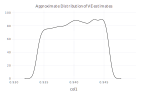

In [25]:
using DataFrames    
df = DataFrame(col1 = b)

using Gadfly

Gadfly.plot(df, Coord.cartesian(xmin=0.93, xmax=0.95),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

In [41]:
# Here we calculate the overall effectiveness of the vaccine for the two groups that are 65 or older
NV_ =  3239+805;
NU_ =  3255+812;
RV_ = 1/NV_;
RU_ = (14+5)/NU_;
VE_ = (RU_ - RV_)/RU_;

Var_RV_ = RV_*(1-RV_)/NV_
Var_RU_ = RU_*(1-RU_)/NU_

print("Overall VE is ", VE_)


Overall VE is 0.9470690822010516

In [42]:
# As before, we use an approximate bootstrap to find the confidence intervals
# using Monte Carlo draws

using Random

B = 10000

x = rand(Truncated(Normal(0, 1), 0, 1), B)
y = rand(Truncated(Normal(0, 1), 0, 1), B)


RVs_ = RV_ .+ x*((Var_RV_)^0.5) 
RUs_ = RU_ .+ x*((Var_RU_)^0.5) 
VEs_= (RUs_ - RVs_) ./ RUs


CI_VE_L_ = quantile!(VEs_, 0.025)
CI_VE_U_ = quantile!(VEs_, 0.975)


print("Two-sided 95 % confidence interval is [", (CI_VE_L_), ",", (CI_VE_U_), "]"   )

95 % confidence interval is [0.8043423757785988,1.072646215751081]

In [45]:
CI_VE_one_ = quantile!(VEs_, 0.05)
print("One-sided 95 % confidence interval is [", (CI_VE_one_), " ,1]"   )

One-sided 95 % confidence interval is [0.8192985382752679 ,1]

In [46]:
#plot
using Distributions  
using StatsBase
using CSV  
using DataFrames    
interval= filter(t ->  quantile!(VEs_, 0.025) < t <  quantile!(VEs_, 0.975), VEs_)
interval
summarystats(interval)

b_=copy(interval)
summarystats(b_)

Summary Stats:
Length:         9501
Missing Count:  0
Mean:           0.932840
Minimum:        0.804347
1st Quartile:   0.884638
Median:         0.931683
3rd Quartile:   0.979581
Maximum:        1.072646


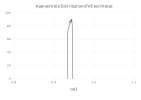

In [47]:
using DataFrames    
df_pfizer = DataFrame(col1 = b)

using Gadfly

Gadfly.plot(df_pfizer, Coord.cartesian(xmin=0.8, xmax=1.1),
    layer(x = "col1", Geom.density , color=[colorant"black"]),
    Guide.title("Approximate Distribution of VE estimates")
)

Using parametric bootstrap (Bernoulli)
